In [1]:
import pandas as pd

In [94]:
df= pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.920,0.0,no,Northeast,2205.9808
1335,18.0,female,36.850,0.0,no,southeast,$1629.8335
1336,21.0,female,25.800,0.0,no,southwest,2007.945


# Task 1. Clean the dataset

In [3]:
df.sex.value_counts()

,count
sex,
male,517
female,503
M,64
man,64
F,62
woman,62


In [4]:
# Define a mapping dictionary
sex_map = {
    'M': 'male',
    'man': 'male',
    'F': 'female',
    'woman': 'female'
}

# Apply the mapping
df['sex'] = df['sex'].replace(sex_map)
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.920,0.0,no,Northeast,2205.9808
1335,18.0,female,36.850,0.0,no,southeast,$1629.8335
1336,21.0,female,25.800,0.0,no,southwest,2007.945


In [5]:
df.region.value_counts()

,count
region,
Southeast,172
southeast,170
southwest,164
Northwest,161
Northeast,155
northeast,153
northwest,149
Southwest,148


In [100]:
# Define a mapping dictionary
region_map = {
    'Southeast': 'southeast',
    'Southwest': 'southwest',
    'Northwest': 'northwest',
    'Northeast': 'northeast'
}

# Apply the mapping
df['region'] = df['region'].replace(region_map)
df.region.value_counts()

,count
region,
southeast,342
southwest,312
northwest,310
northeast,308


In [99]:
df.charges= df.charges.str.replace('$', '', regex=False)
#df.charges=df.charges.str.strip()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,4449.462
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.8552


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.dropna(how='all', inplace=True)

In [10]:
# df.isnull().all(axis=1).sum()

In [11]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges


In [12]:
df[df.isnull().any(axis=1)]
# df[df.isnull().all(axis=1)]

,age,sex,bmi,children,smoker,region,charges
23,-34.0,female,NaN,1.0,yes,NaN,37701.8768
32,NaN,NaN,28.600,NaN,NaN,southwest,nan
43,37.0,female,NaN,NaN,NaN,southeast,6313.759
44,NaN,male,NaN,NaN,no,NaN,NaN
49,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1296,NaN,NaN,26.125,0.0,NaN,northeast,1708.92575
1309,NaN,male,NaN,NaN,no,southwest,NaN
1312,NaN,male,NaN,1.0,NaN,southwest,4536.259
1314,30.0,NaN,23.655,NaN,yes,northwest,NaN


In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,4449.462
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.8552


In [14]:
df.age=df.age.astype('str').str.replace('-','', regex=False)
df.age= pd.to_numeric(df.age, errors='coerce')        #invalid values become NaN
df[df.age<0]
df.children=df.children.astype('str').str.replace('-','', regex=False)
df.children= pd.to_numeric(df.children, errors='coerce')        #invalid values become NaN
df[df.children<0]

,age,sex,bmi,children,smoker,region,charges


In [103]:
df.charges= df.charges.astype('float')

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1271 non-null   float64
 1   sex       1271 non-null   object 
 2   bmi       1271 non-null   float64
 3   children  1271 non-null   float64
 4   smoker    1271 non-null   object 
 5   region    1271 non-null   object 
 6   charges   1271 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.4+ KB


In [18]:
df.dropna(inplace=True)

In [19]:
df.age= df.age.astype('int')
df.children=df.children.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1206 non-null   int64  
 1   sex       1206 non-null   object 
 2   bmi       1206 non-null   float64
 3   children  1206 non-null   int64  
 4   smoker    1206 non-null   object 
 5   region    1206 non-null   object 
 6   charges   1206 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 75.4+ KB


In [101]:
df.smoker= df.smoker.replace({1:True, 2:False})
df.smoker= df.smoker.astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1338 non-null   bool   
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: bool(1), float64(3), object(3)
memory usage: 64.2+ KB


In [21]:
df.to_csv('clean_df', index=False)

# Task 2: Create the scatterplots of variable

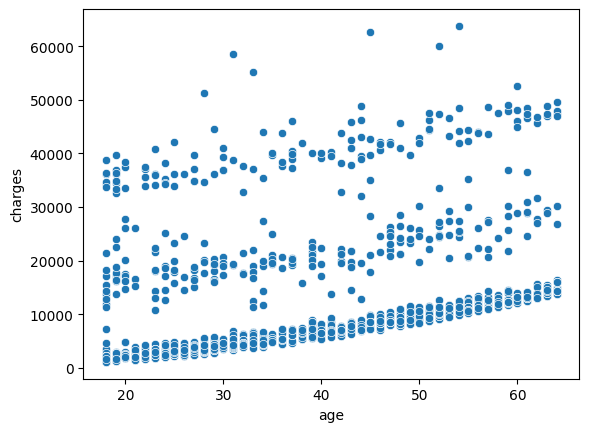

In [22]:
# Scatterplots of relationships of variables between age and charges
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="age", y="charges", data=df)
plt.show()

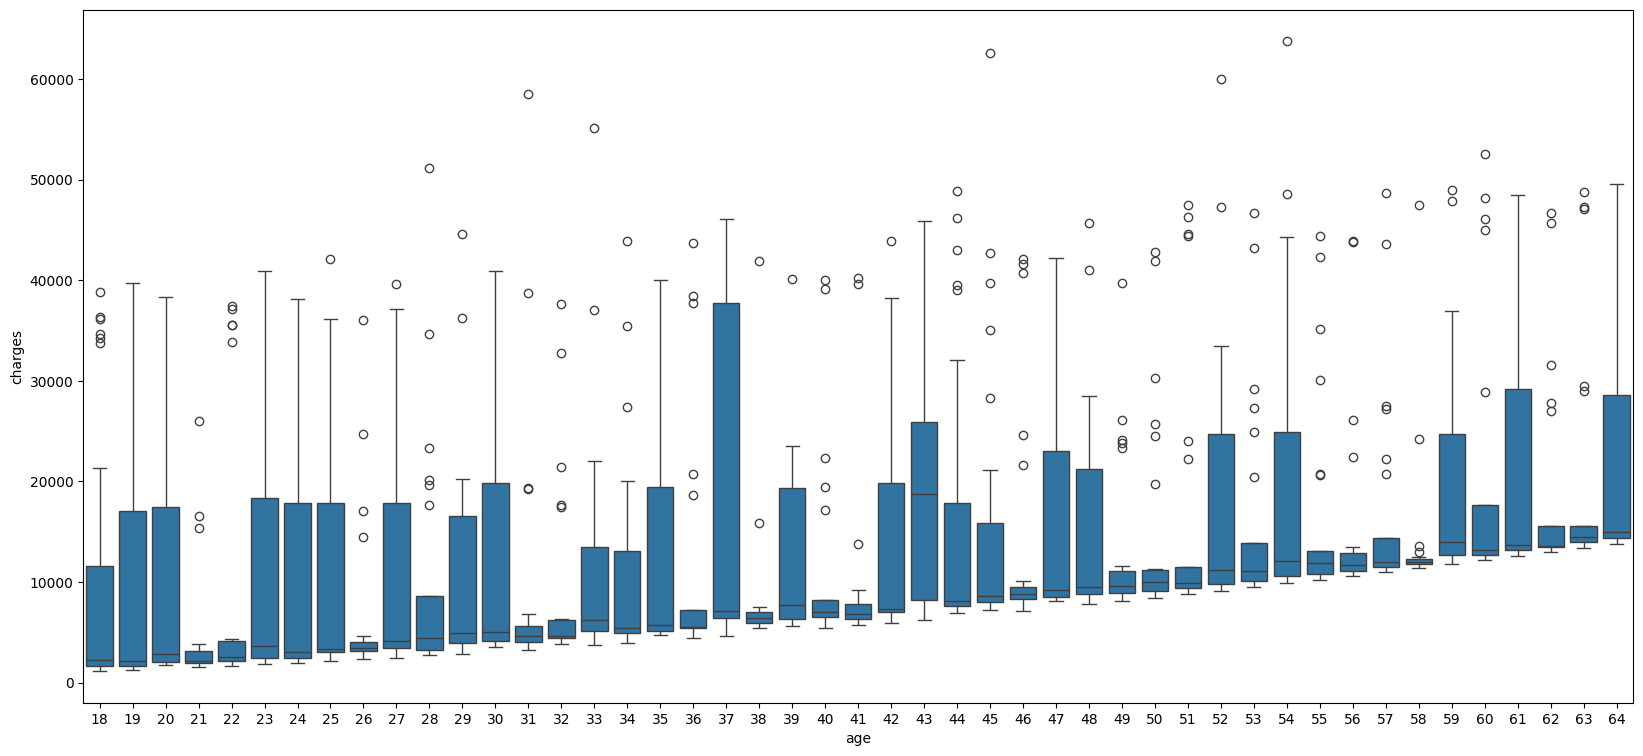

In [23]:
# make the fig larger
plt.figure(figsize=(20, 9))     # Set canvas size first
sns.boxplot(x="age", y="charges", data=df)   # Then draw the plot
plt.show()

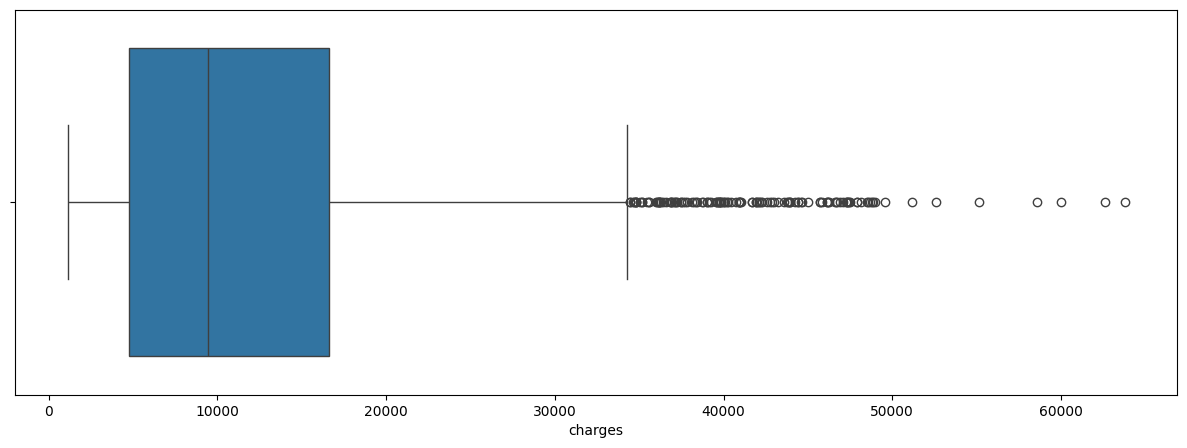

In [24]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df.charges)
plt.show()

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,True,southeast,1725.55230
2,28,male,33.000,3,True,southeast,4449.46200
3,33,male,22.705,0,True,northwest,21984.47061
4,32,male,28.880,0,True,northwest,3866.85520


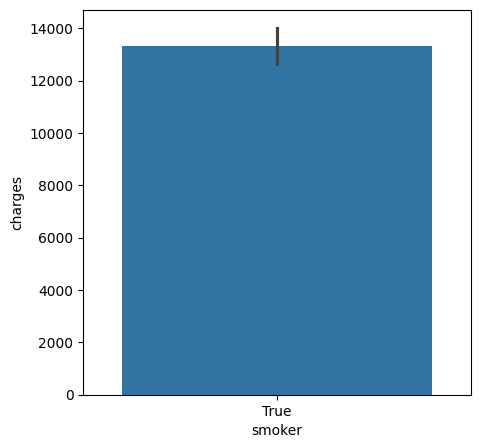

In [26]:
plt.figure(figsize=(5,5))
sns.barplot(y=df.charges, x=df.smoker)
plt.show()

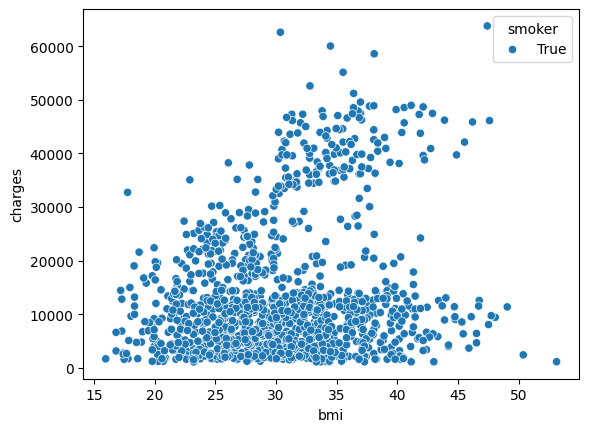

In [27]:
sns.scatterplot(x=df.bmi, y=df.charges, hue=df.smoker)
plt.show()

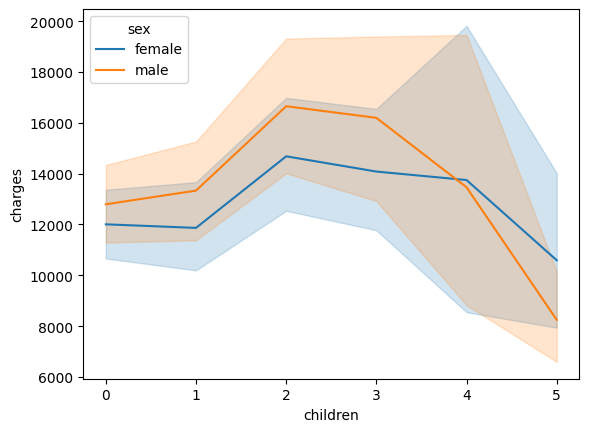

In [28]:
# make two lineplot in one
sns.lineplot(x=df.children, y=df.charges, hue=df.sex)
plt.show()

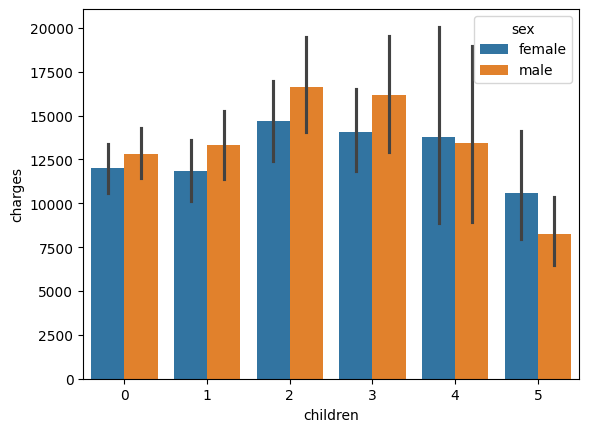

In [29]:
sns.barplot(y=df.charges , x=df.children, hue=df.sex)
plt.show()

# Task 3: Prepare the data for regression model fitting

In [30]:
df_new= df.copy()

In [31]:
df_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,True,southeast,1725.55230
2,28,male,33.000,3,True,southeast,4449.46200
3,33,male,22.705,0,True,northwest,21984.47061
4,32,male,28.880,0,True,northwest,3866.85520


In [32]:
df_new.sex= df_new.sex.replace({'male':True, 'female':False },regex=False)
df_new.sex=df_new.sex.astype('int')
df_new.smoker= df_new.smoker.astype('int')

df_new.head()

/tmp/ipython-input-1710179165.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new.sex= df_new.sex.replace({'male':True, 'female':False },regex=False)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


In [33]:
df_new=pd.get_dummies(df_new, columns=['region'])
df_new.head()


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,1,1725.55230,False,False,True,False
2,28,1,33.000,3,1,4449.46200,False,False,True,False
3,33,1,22.705,0,1,21984.47061,False,True,False,False
4,32,1,28.880,0,1,3866.85520,False,True,False,False


In [34]:
df_new.iloc[:,-4:]=df_new.iloc[:,-4:].astype('int')
df_new.head()

/tmp/ipython-input-3867485357.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    0
1336    0
1337    0
Name: region_northeast, Length: 1206, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_new.iloc[:,-4:]=df_new.iloc[:,-4:].astype('int')
/tmp/ipython-input-3867485357.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0
1       0
2       0
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    1
Name: region_northwest, Length: 1206, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_new.iloc[:,-4:]=df_new.iloc[:,-4:].astype('int')
/tmp/ipython-input-3867485357.py:1: FutureWarning: Setting an item of incompatible dtype

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,1,1725.55230,0,0,1,0
2,28,1,33.000,3,1,4449.46200,0,0,1,0
3,33,1,22.705,0,1,21984.47061,0,1,0,0
4,32,1,28.880,0,1,3866.85520,0,1,0,0


# Task 4: Fit a linear Regression Model to data

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,True,southeast,1725.55230
2,28,male,33.000,3,True,southeast,4449.46200
3,33,male,22.705,0,True,northwest,21984.47061
4,32,male,28.880,0,True,northwest,3866.85520


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df_new.drop(['charges'], axis=1)
y = df_new['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 130543728.43660487
R-squared: 0.07730557454361808


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1206 non-null   int64  
 1   sex               1206 non-null   int64  
 2   bmi               1206 non-null   float64
 3   children          1206 non-null   int64  
 4   smoker            1206 non-null   int64  
 5   charges           1206 non-null   float64
 6   region_northeast  1206 non-null   int64  
 7   region_northwest  1206 non-null   int64  
 8   region_southeast  1206 non-null   int64  
 9   region_southwest  1206 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 103.6 KB


In [38]:
val_df= pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/validation_dataset.csv')
val= val_df.copy()
val.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [39]:
val_df.drop_duplicates(inplace=True)
val_df.age=val_df.age.astype('int')
val_df.sex= val_df.sex.replace({'male':True, 'female':False },regex=False)
val_df.sex=val_df.sex.astype('int')
val_df.smoker= val_df.smoker.replace({'yes':True, 'no':False },regex=False)
val_df.smoker=val_df.smoker.astype('int')
val_df= pd.get_dummies(val_df, columns=['region'])



/tmp/ipython-input-4199984879.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val_df.sex= val_df.sex.replace({'male':True, 'female':False },regex=False)
/tmp/ipython-input-4199984879.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val_df.smoker= val_df.smoker.replace({'yes':True, 'no':False },regex=False)


In [40]:
val_df.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,18,0,24.090000,1.0,0,False,False,True,False
1,39,1,26.410000,0.0,1,True,False,False,False
2,27,1,29.150000,0.0,1,False,False,True,False
3,71,1,65.502135,13.0,1,False,False,True,False
4,28,1,38.060000,0.0,0,False,False,True,False


In [41]:
val_df.iloc[:,-4:]=val_df.iloc[:,-4:].astype('int')
val_df.head(5)

/tmp/ipython-input-4250241934.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    1
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
30    1
31    0
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    1
42    0
43    0
44    1
45    0
46    0
47    0
48    1
49    0
Name: region_northeast, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  val_df.iloc[:,-4:]=val_df.iloc[:,-4:].astype('int')
/tmp/ipython-input-4250241934.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     1
9     0
10    0
11    1
12    0
13    0
14

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,18,0,24.090000,1.0,0,0,0,1,0
1,39,1,26.410000,0.0,1,1,0,0,0
2,27,1,29.150000,0.0,1,0,0,1,0
3,71,1,65.502135,13.0,1,0,0,1,0
4,28,1,38.060000,0.0,0,0,0,1,0


In [42]:
pred= model.predict(val_df)
pred = [x if x>0 else 1000 for x in pred]
pred

[np.float64(6326.110579407477),
 np.float64(12150.604959399152),
 np.float64(10730.036515983236),
 np.float64(41683.416029634216),
 np.float64(13864.047716063735),
 np.float64(41325.37757882884),
 np.float64(11035.114118478043),
 np.float64(17140.5528684742),
 np.float64(15789.833039547571),
 np.float64(22886.046004368847),
 np.float64(8760.276323190285),
 np.float64(17853.251532720762),
 np.float64(16008.042595657593),
 np.float64(15163.01301278457),
 np.float64(6529.271040256805),
 np.float64(10306.599227268507),
 np.float64(48427.750223185554),
 np.float64(46725.1784547102),
 np.float64(38284.979498004104),
 np.float64(14374.765648366203),
 np.float64(5158.140844071742),
 np.float64(16901.878605134763),
 np.float64(11810.914919731422),
 np.float64(15757.689524668825),
 np.float64(14996.313104513574),
 np.float64(8960.7245992739),
 np.float64(40563.52157396495),
 np.float64(7184.979995802629),
 np.float64(16977.363062036053),
 np.float64(15756.365560062404),
 np.float64(10602.8971044

In [43]:
val['Predict']=pred
val.head()

,age,sex,bmi,children,smoker,region,Predict
0,18.0,female,24.090000,1.0,no,southeast,6326.110579
1,39.0,male,26.410000,0.0,yes,northeast,12150.604959
2,27.0,male,29.150000,0.0,yes,southeast,10730.036516
3,71.0,male,65.502135,13.0,yes,southeast,41683.416030
4,28.0,male,38.060000,0.0,no,southeast,13864.047716


In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,True,southeast,1725.55230
2,28,male,33.000,3,True,southeast,4449.46200
3,33,male,22.705,0,True,northwest,21984.47061
4,32,male,28.880,0,True,northwest,3866.85520


In [95]:
demo=df.copy()

In [105]:
features = [feature for feature in df.columns if df[feature].dtype=='O']
features

['sex', 'region']

In [106]:
features = [feature for feature in df.columns if df[feature].dtype=='O']

for feature in features:
    # Step 1: get average charges per category
    labels_ordered = df.groupby(feature)['charges'].mean().sort_values().index

    # Step 2: create mapping dict
    labels_ordered = {k:i for i,k in enumerate(labels_ordered, 0)}

    # Step 3: map only this column
    df[feature] = df[feature].map(labels_ordered)


In [107]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,1.0,27.900,0.0,True,1.0,16884.92400
1,18.0,4.0,33.770,1.0,True,3.0,1725.55230
2,28.0,4.0,33.000,3.0,True,3.0,4449.46200
3,33.0,4.0,22.705,0.0,True,0.0,21984.47061
4,32.0,4.0,28.880,0.0,True,0.0,3866.85520


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

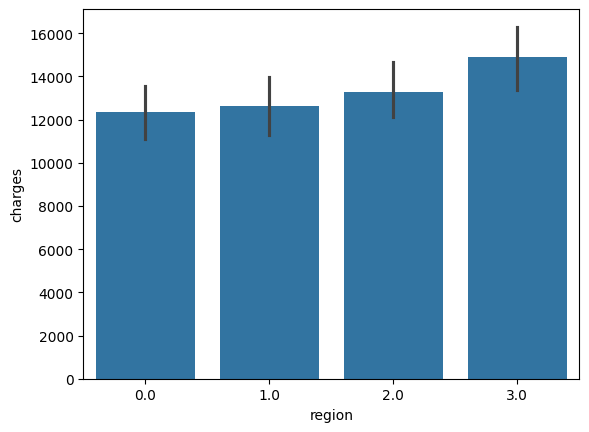

In [116]:
sns.barplot(x=df.region, y=df.charges)
plt.show()